# Bigram Language Model - Matrix Version

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset of domain names from the file
dataset_name = '../data/domain_names_full.txt'
dataset = open(dataset_name, 'r').read().split()
len(dataset)

4345850

In [3]:
# Shortest domain name
min(len(x) for x in dataset)

4

In [4]:
# Longest domain name
np.argmax([len(x) for x in dataset])


np.int64(19484)

In [5]:
dataset[19484]

'xn-----0b4asja7ccgu2b4b0gd0edbjm2jpa1b1e9zva7a0347s4da2797e8qri.xn--1ck2e1b'

In [6]:
# Visualize the first 10 examples to understand the data structure
for d in dataset[:10]:
    for c1, c2 in zip(d, d[1:]):
        print(c1,c2)

g o
o o
o g
g l
l e
e .
. c
c o
o m
a -
- m
m s
s e
e d
d g
g e
e .
. n
n e
e t
m i
i c
c r
r o
o s
s o
o f
f t
t .
. c
c o
o m
f a
a c
c e
e b
b o
o o
o k
k .
. c
c o
o m
a m
m a
a z
z o
o n
n a
a w
w s
s .
. c
c o
o m
g o
o o
o g
g l
l e
e a
a p
p i
i s
s .
. c
c o
o m
a p
p p
p l
l e
e .
. c
c o
o m
y o
o u
u t
t u
u b
b e
e .
. c
c o
o m
r o
o o
o t
t -
- s
s e
e r
r v
v e
e r
r s
s .
. n
n e
e t
a k
k a
a m
m a
a i
i .
. n
n e
e t


In [7]:
# Looking for '*' in dataset
'*' in set([y for x in dataset for y in x])

False

In [8]:
# Print the bigrams for the first example
# We add the special token '*' to denote start and end
for d in dataset[:1]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        print(c1,c2)

* g
g o
o o
o g
g l
l e
e .
. c
c o
o m
m *


In [9]:
# Implement a simple bigram counting using a python dictionary
# Note: Iterating with simple python loops can be slow on very large datasets
bigrams = dict()
for d in dataset:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        bigrams[(c1, c2)] = bigrams.get((c1,c2), 0) + 1

In [10]:
len(bigrams.keys())

1500

In [11]:
# Create the character set including the special start/end token '*'
# Build mappings from character to index (ctoi) and index to character (itoc)
charset = ['*'] + sorted(list(set([y for x in dataset for y in x])))
ctoi = {c:i for i, c in enumerate(charset)}
itoc = {i:c for i, c in enumerate(charset)}

In [12]:
#Translation
ctoi['c']

16

In [13]:
# I'll use a 2D numpy array to store the counts of every bigram.
bigram_count = np.zeros((5, 3, 4))

In [14]:
# Initialize a count matrix for bigrams with zeros
# The shape matches the character set size (N x N)
bigram_count = np.zeros((len(charset), len(charset))).astype(int)

In [15]:
bigram_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(40, 40))

In [16]:
# Populate the bigram count matrix by iterating over the full dataset
for d in dataset:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        bigram_count[ctoi[c1], ctoi[c2]] += 1

In [17]:
#view
bigram_count

array([[     0,      2,      0, ...,  52485,  53384,  55244],
       [     0,  31226,      2, ...,   6031,   4517,   7787],
       [     0,      0,      0, ...,  72016,    529,  10540],
       ...,
       [ 12941,  12622,  74637, ...,  17950,  72483,   3644],
       [ 22402,  23564, 172837, ...,   5031,   7042,  68705],
       [132325,   5796,  40737, ...,   5103,   9968,  35271]],
      shape=(40, 40))

(np.float64(-0.5), np.float64(39.5), np.float64(39.5), np.float64(-0.5))

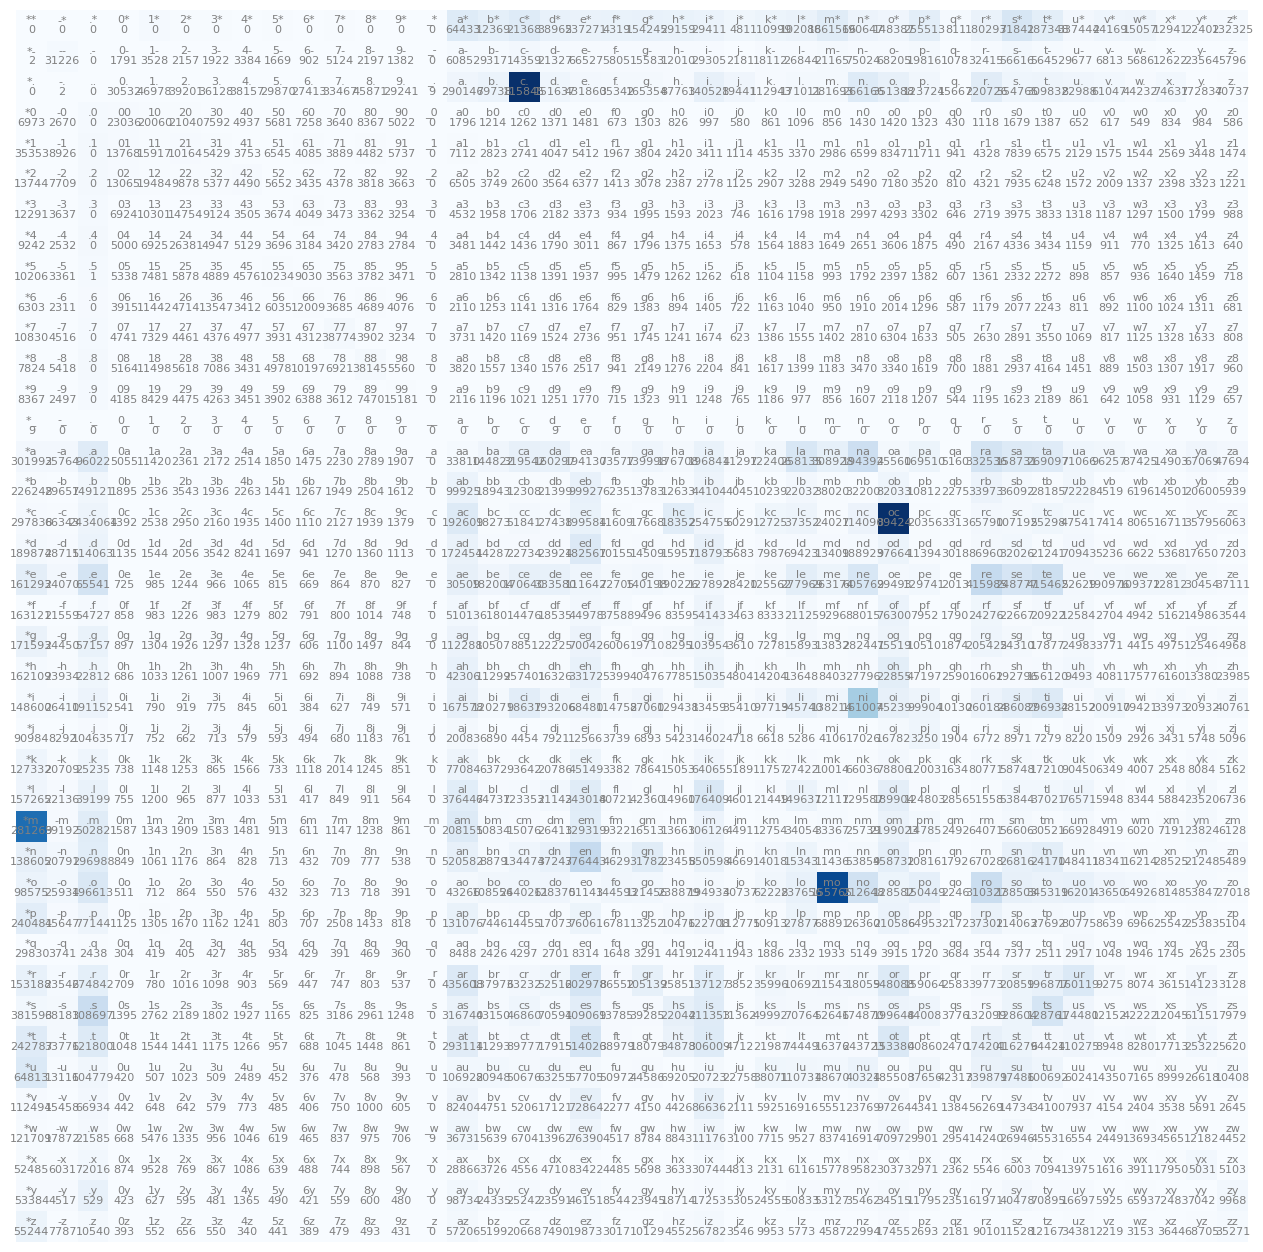

In [18]:
# Visualize the bigram counts as a heatmap
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_count, cmap='Blues')
for i in range(len(charset)):
    for j in range(len(charset)):
        chars = itoc[i]+itoc[j]
        # Text is placed at (x, y) = (i, j)
        plt.text(i, j, chars, ha='center', va='bottom', color='grey', fontsize=8)
        plt.text(i, j, bigram_count[i,j], ha='center', va='top', color='grey', fontsize=8)
plt.axis('off')

In [19]:
# Bigram Probability by Raw
p = bigram_count[0]
p = p/p.sum()
p.sum()

np.float64(1.0)

In [20]:
#Sampling a character 
np.random.seed(42)
draw = np.random.choice(charset, 1, p=p, replace=True)
draw

array(['g'], dtype='<U1')

In [21]:
def generate(bigram_count):
    # Generate new examples based on the bigram counts
    new = []
    # Start probability distribution from the start token '*' (index 0)
    p = bigram_count[0]
    p = p/p.sum()
    draw = np.random.choice(charset, 1, p=p, replace=True)[0]
    while draw != '*':
        p = bigram_count[ctoi[draw]]
        p = p/p.sum()
        draw = np.random.choice(charset, 1, p=p, replace=True)[0]
        new.append(draw)
    return ''.join(new[:-1])

In [22]:
#Sampling domains
for _ in range(10):
    print(generate(bigram_count))

om
atio
x.chenediclemeang
a.uxxb676.c.sareng.viusit
ajifredico.xu.asoor.cbsle-deslte.meorine
.ihitalol.ceuslst.ristcaelor
ebakuconexy.cld-nf.colany.jp.nerng
ch.er
ap.jit.causartincattjilostpl.com
o


### Negative Log Likelihood
The probabilities the model assigns to each individual bigram should be as close to 1 as possible. For each bigram, if the probability were uniform, we would have a probability of $1 / \text{len(charset)}$. Any model that learns anything will assign higher probability values to certain bigrams. If our model were perfect, it would assign a probability of 1 to every single individual bigram.

In [23]:
1/len(charset)

0.025

Maximum Likelihood Estimation (MLE) is defined as the product of the probabilities. 
We will use this value as an indicator of how well our model performs; 
if the estimator is 1, the model is perfect. 

However, note that the product of values between 0 and 1 is generally 
numerically ill-conditioned. It produces extremely small numbers that exceed 
the limits of floating-point representation and end up rounding to zero (underflow). 

To prevent this, we use the log-likelihood. 
Recall that: log(a * b * c) = log(a) + log(b) + log(c).

Therefore, we can calculate the log-likelihood in the following way:


In [24]:
# Compute probability matrix by normalizing rows
# keepdims=True ensures proper broadcasting
bigram_prob = bigram_count/bigram_count.sum(axis=1, keepdims=True)

In [25]:
# Calculate the average negative log likelihood (loss) of the model on the dataset
log_likelihood = 0.0
for d in dataset[:2]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        prob = bigram_prob[ctoi[c1], ctoi[c2]]
        log_likelihood += np.log(prob)
        print(f'{c1}{c2} {prob:.4f}')
print(f'{log_likelihood=:0.4f}')

*g 0.0395
go 0.0905
oo 0.0222
og 0.0130
gl 0.0316
le 0.1244
e. 0.0940
.c 0.5115
co 0.5720
om 0.3794
m* 0.5301
*a 0.0695
a- 0.0145
-m 0.0535
ms 0.0150
se 0.0814
ed 0.0397
dg 0.0141
ge 0.1045
e. 0.0940
.n 0.0624
ne 0.1793
et 0.1119
t* 0.0920
log_likelihood=-62.2402


Para hacer comparaciones entre modelos y datasets, lo mejor normalizar el (log) likelihood por la cantidad de muestras utilizada para calcularlo. Así, usamos el promedio del (log) likelihood.

In [26]:
# Calculate the average negative log likelihood (loss) of the model on the dataset
prodprobs = 1
log_likelihood = 0.0
n = 0
for d in dataset[:2]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        prob = bigram_prob[ctoi[c1], ctoi[c2]]
        prodprobs *= prob
        log_likelihood += np.log(prob)
        n += 1
        print(f'{c1}{c2} {prob:.4f}')
print(f'{prodprobs=} <== Note how small this probability product becomes')
print(f'{log_likelihood= :0.4f}')
print(f'Average log_likelihood: {log_likelihood/n:0.4f}')

*g 0.0395
go 0.0905
oo 0.0222
og 0.0130
gl 0.0316
le 0.1244
e. 0.0940
.c 0.5115
co 0.5720
om 0.3794
m* 0.5301
*a 0.0695
a- 0.0145
-m 0.0535
ms 0.0150
se 0.0814
ed 0.0397
dg 0.0141
ge 0.1045
e. 0.0940
.n 0.0624
ne 0.1793
et 0.1119
t* 0.0920
prodprobs=np.float64(9.320347478012834e-28) <== Note how small this probability product becomes
log_likelihood= -62.2402
Average log_likelihood: -2.5933


Finally, we will use this as our loss function. 
The semantics of a loss function dictate that the lower the value, the better the model. 
Therefore, we use the Negative Log-Likelihood (NLL). 

Since the logarithm is a monotonically increasing function—which, for probabilities 
ranging from 0 to 1, maps to values between -inf and 0—the negative of the 
function is monotonically decreasing from inf to 0.

C:\Users\User\AppData\Local\Temp\ipykernel_20748\2607105287.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x), label='log(x)')
C:\Users\User\AppData\Local\Temp\ipykernel_20748\2607105287.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(-np.log(x), label='-log(x)')


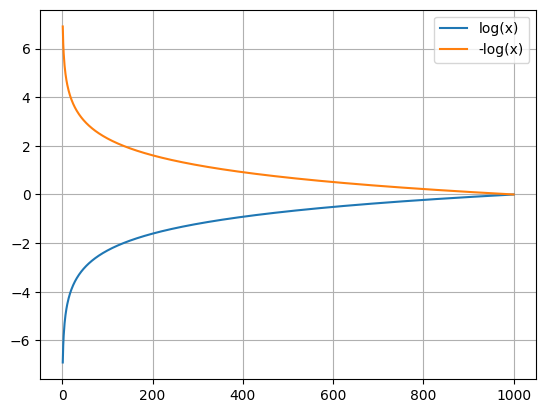

In [27]:
x = np.arange(0,1.001, 0.001)
plt.plot(np.log(x), label='log(x)')
plt.plot(-np.log(x), label='-log(x)')
plt.grid()
plt.legend()

The following equivalences hold true:
- Maximizing the Likelihood is equivalent to:
- Maximizing the Log-Likelihood, which is equivalent to:
- Maximizing the Average Log-Likelihood, which is equivalent to:
- Minimizing the Negative Average Log-Likelihood.

Therefore, we can use the average negative log-likelihood as a loss function 
and to evaluate how good our models are. This is the same function we will 
use to train everything from basic neural networks to transformers.

In [28]:
def nll(s: list[str]) -> float:
    log_likelihood = 0.
    n = 0
    for d in s:
        example = ['*'] + list(d) + ['*']
        for c1, c2 in zip(example, example[1:]):
            prob = bigram_prob[ctoi[c1], ctoi[c2]]
            log_likelihood += np.log(prob)
            n += 1
            print(f'{c1}{c2} {prob:.4f} {np.log(prob):0.4f}')
    return -log_likelihood/n

In [29]:
nll(['joaquin.cmm*']) # <-- This results in inf loss; necessitates model smoothing

*j 0.0209 -3.8663
jo 0.1010 -2.2924
oa 0.0079 -4.8460
aq 0.0020 -6.2036
qu 0.3086 -1.1758
ui 0.0257 -3.6607
in 0.2385 -1.4334
n. 0.0788 -2.5413
.c 0.5115 -0.6705
cm 0.0035 -5.6454
mm 0.0095 -4.6563
m* 0.5301 -0.6347
** 0.0000 -inf


C:\Users\User\AppData\Local\Temp\ipykernel_20748\1438417475.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(prob)
C:\Users\User\AppData\Local\Temp\ipykernel_20748\1438417475.py:10: RuntimeWarning: divide by zero encountered in log
  print(f'{c1}{c2} {prob:.4f} {np.log(prob):0.4f}')


np.float64(inf)